In [19]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
dataset=pd.read_csv("iris.csv")

In [63]:
dataset.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [64]:
dataset=dataset.drop(columns="Unnamed: 0")


In [65]:
dataset['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [66]:
dataset['Species'].unique() 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [68]:
dataset['Species']=le.fit_transform(dataset['Species'])


In [72]:
dataset['Species'].unique() 

array([0, 1, 2], dtype=int64)

In [73]:
#dataset.Species.str.get_dummies().head()

In [74]:
from sklearn.utils import shuffle
dataset1 = shuffle(dataset)

In [75]:
dataset1=dataset1.reset_index().drop(columns="index")

In [83]:
dataset1.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal.Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal.Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


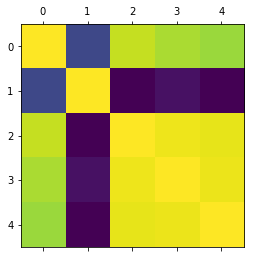

In [88]:
import matplotlib.pyplot as plt

plt.matshow(dataset1.corr())
plt.show()

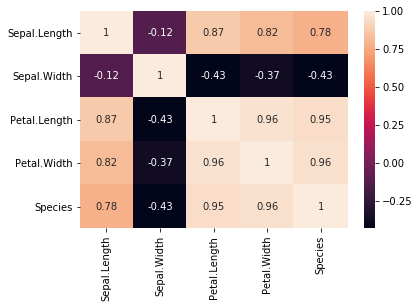

In [87]:
import seaborn as sns
corr = dataset1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

In [96]:
dataset1.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X=dataset1.drop(columns=["Species","Sepal.Width"])

In [171]:
y=dataset1['Species']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [173]:
#y_test

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
neigb=KNeighborsClassifier(n_neighbors=10)

In [176]:
neigb.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [177]:
y_pred=neigb.predict(X_test)

In [178]:
from sklearn.metrics import confusion_matrix

In [179]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  1],
       [ 0,  2, 12]], dtype=int64)

In [180]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[18  0  0]
 [ 0 17  1]
 [ 0  2 12]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.14 0.86]]


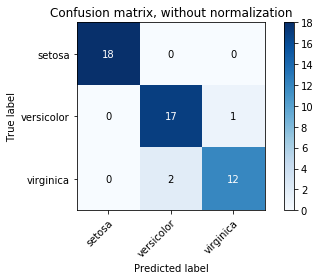

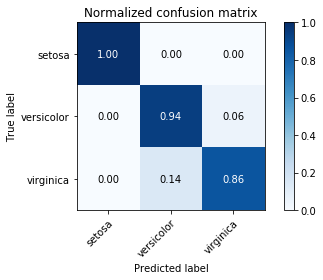

In [181]:
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


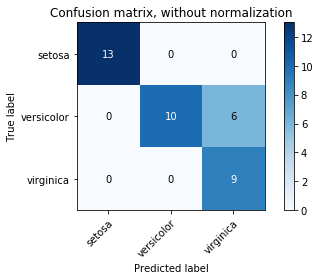

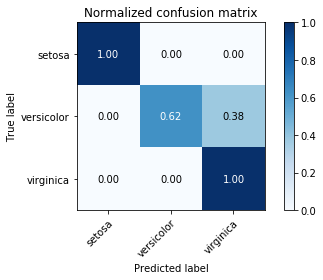

In [165]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)



np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()